### Decision tree analysis
This analysis is to check that in the years where there was a great number of cases of stealing,robbery,theft did the people go outsifde to purchase  the items 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Desktop/ML/datasets_851_1557_reported.csv')
df

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
0,1950,2784,2306,120,1,105,40,5,1578,295,...,NaN,NaN,NaN,3,209,72,477,0.0,49,7014000
1,1951,3284,2754,125,1,109,45,6,1899,342,...,NaN,NaN,NaN,3,310,73,530,0.0,66,7073000
2,1952,3160,2608,119,1,104,39,4,1846,372,...,NaN,NaN,NaN,3,217,82,553,0.0,78,7125000
3,1953,2909,2689,119,1,105,45,5,1929,361,...,NaN,NaN,NaN,4,209,88,220,0.0,91,7171000
4,1954,3028,2791,126,1,107,41,5,1981,393,...,NaN,NaN,NaN,4,236,101,237,0.0,103,7213000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2011,14988,12267,1005,2,947,181,69,5783,995,...,213.0,706.0,663.0,103,1220,1774,2721,946.0,314,9449000
62,2012,14734,12148,974,2,914,178,66,5613,922,...,169.0,655.0,635.0,97,1356,1600,2586,994.0,286,9519000
63,2013,14603,12072,896,3,837,184,63,5552,888,...,159.0,543.0,509.0,87,1545,1470,2532,1002.0,279,9644000
64,2014,14890,12305,923,3,859,210,69,5572,913,...,147.0,542.0,505.0,86,1610,1559,2585,983.0,271,9747000



Adding a purchased column

In [4]:
purchased = ['Y','Y','Y','Y','Y','Y','Y','Y','N','N','N','Y','N','Y',
            'Y','Y','N','Y','Y','N','Y','Y','N','Y','N','N','N','N','N',
            'Y','N','N','N','N','N','N','N','N','N','N','N','N','Y','N','N',
            'Y','N','N','Y','Y','Y','N','N','Y','Y','Y','N','N','Y','Y','N',
            'N','Y','Y','Y','Y']
df['purchased'] = purchased

In [5]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column>0])

house.theft             15
vehicle.theft            7
out.of.vehicle.theft    15
shop.theft              15
narcotics                4
dtype: int64


In [6]:
df = df.dropna(axis = 0)
df.head()

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population,purchased
15,1965,5801,5090,167,3,151,51,8,3694,1042,...,717.0,123.0,12,431,297,711,10.0,213,7734000,Y
16,1966,6063,5263,184,3,166,48,8,3736,1031,...,641.0,168.0,14,529,287,800,13.0,218,7808000,N
17,1967,6421,5555,189,2,173,49,8,3939,1086,...,639.0,204.0,13,548,314,867,51.0,229,7868000,Y
18,1968,7166,6242,228,1,212,47,8,4240,1232,...,628.0,291.0,15,801,364,924,101.0,201,7914000,Y
19,1969,7671,6036,241,1,223,42,8,4142,1131,...,574.0,255.0,16,681,376,1635,552.0,231,7968000,N


In [7]:
#filtering the df to get those columns which affect the purchasing 
dfd = df.filter(['stealing.general','shop.theft','burglary','robbery','fraud',
                'vehicle.theft','house.theft','purchased'],axis=1)
dfd.head()


,stealing.general,shop.theft,burglary,robbery,fraud,vehicle.theft,house.theft,purchased
15,3694,123.0,1042,12,431,397.0,99.0,Y
16,3736,168.0,1031,14,529,350.0,105.0,N
17,3939,204.0,1086,13,548,384.0,108.0,Y
18,4240,291.0,1232,15,801,396.0,114.0,Y
19,4142,255.0,1131,16,681,384.0,116.0,N


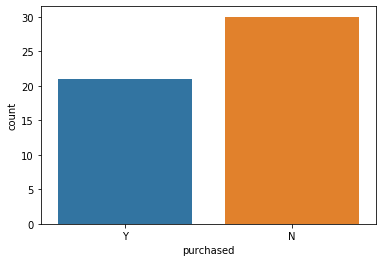

In [8]:
import seaborn as sns
sns.countplot(df['purchased'],label='Year')

Converting categorical data to numerical data

In [9]:
features = list(dfd.columns[:7])
features

['stealing.general',
 'shop.theft',
 'burglary',
 'robbery',
 'fraud',
 'vehicle.theft',
 'house.theft']

In [10]:

#now construct the actual decision tree
from sklearn import tree
y = df['purchased']
x = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x= st_x.fit_transform(x)    
x= st_x.transform(x)    

C:\Users\admin\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


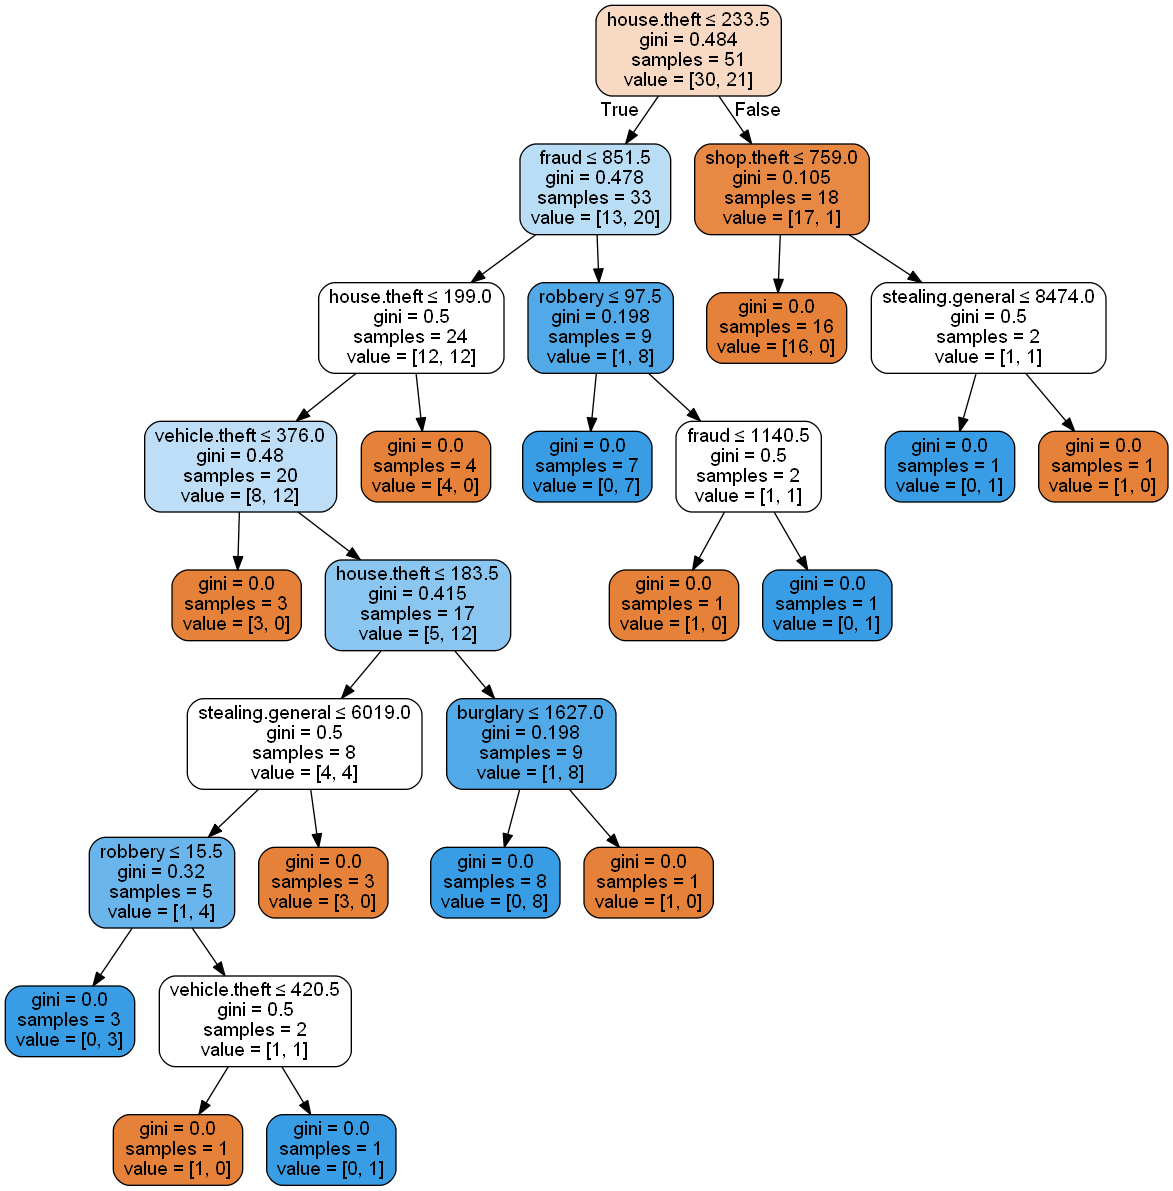

In [11]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO()
#export from classifier
tree.export_graphviz(clf,out_file=dot_data,feature_names= features,filled=True,rounded=True,special_characters =True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())#creating graph
Image(graph.create_png())

In [12]:
y_pred= clf.predict(x)  

In [13]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix 
cm= confusion_matrix(y, y_pred)  
cm

array([[30,  0],
       [21,  0]], dtype=int64)

### Conclusion:

Out of all the years :

Total = 51 years

Did not prefer to go for purchasing = 30years

Did go for purchasing = 21 years

### Choosing the apt algorithm for classification

In [14]:
x = dfd[features]
y = dfd['purchased']


In [15]:
dfd['purchased'] = df['purchased'].astype('category')
dfd.dtypes

stealing.general       int64
shop.theft           float64
burglary               int64
robbery                int64
fraud                  int64
vehicle.theft        float64
house.theft          float64
purchased           category
dtype: object

In [16]:
cat_columns = dfd.select_dtypes(['category']).columns
dfd[cat_columns] = dfd[cat_columns].apply(lambda x: x.cat.codes)
dfd.head()


,stealing.general,shop.theft,burglary,robbery,fraud,vehicle.theft,house.theft,purchased
15,3694,123.0,1042,12,431,397.0,99.0,1
16,3736,168.0,1031,14,529,350.0,105.0,0
17,3939,204.0,1086,13,548,384.0,108.0,1
18,4240,291.0,1232,15,801,396.0,114.0,1
19,4142,255.0,1131,16,681,384.0,116.0,0


In [22]:
x = dfd.iloc[:,[0,1,2,3,4,5,6]].values
y = dfd.iloc[:,7].values

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
from sklearn.linear_model import LogisticRegression

from sklearn import svm, tree,naive_bayes,neighbors
from sklearn.ensemble import RandomForestClassifier


In [19]:
classifiers =[]
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model14 = LogisticRegression()
classifiers.append(model14)
model15 = naive_bayes.GaussianNB()
classifiers.append(model15)
model16 = neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifiers.append(model16)
model17 = RandomForestClassifier(n_estimators=10,criterion='entropy')
classifiers.append(model17)

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred= clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of is %s"%( cm))

Accuracy of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is 0.5454545454545454
Confusion Matrix of is [[4 5]
 [0 2]]
Accuracy of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is 0.5454545454545454
Confusion Matrix of is [[4 5]
 [0 2]]
Accuracy of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   mu

### Only  logistic regression and naive bayes fit and that to average around 72%

### Applying backward elimination to remve unwanted features


In [24]:
import statsmodels.api as sm
x = np.append(arr = np.ones((51,1)).astype(int), values=x, axis=1)  
#X = x[:,[5,6,7]]
X = df.iloc[:,[0,1,2,3,4,5,6]].values
#y = df.iloc[:,21].values


X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y.astype(float), X.astype(float)).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     3.730
Date:                Fri, 19 Jun 2020   Prob (F-statistic):            0.00307
Time:                        22:22:20   Log-Likelihood:                -24.109
No. Observations:                  51   AIC:                             64.22
Df Residuals:                      43   BIC:                             79.67
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.3790     75.065     -0.724      0.473    -205.761      97.003
x1             0.0286      0.039      0.741      0.463      -0.049       0.106
x2            -0.0006      0.000     -2.605      0.013      -0.001      -0.000
x3             0.0006      0.000      2.204      0.033    4.97e-05       0.001
x4            -0.0016      0.027     -0.058      0.954      -0.057       0.053
x5            -0.2394      0.116     -2.057      0.046      -0.474      -0.005
x6            -0.0006      0.027     -0.021      0.984      -0.055       0.053
x7             0.0146      0.008      1.884      0.066      -0.001       0.030
==============================================================================
Omnibus:                        6.346   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                2.344
Skew:                           0.094   Prob(JB):                        0.310
Kurtosis:                       1.967   Cond. No.                     2.07e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
import statsmodels.api as sm
x = np.append(arr = np.ones((51,1)).astype(int), values=x, axis=1)  
#X = x[:,[5,6,7]]
X = df.iloc[:,[0,1,2,3,4,6]].values
#y = df.iloc[:,21].values


X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y.astype(float), X.astype(float)).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     4.453
Date:                Fri, 19 Jun 2020   Prob (F-statistic):            0.00133
Time:                        22:22:21   Log-Likelihood:                -24.109
No. Observations:                  51   AIC:                             62.22
Df Residuals:                      44   BIC:                             75.74
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.8438     70.828     -0.774      0.443    -197.588      87.901
x1             0.0288      0.036      0.792      0.433      -0.045       0.102
x2            -0.0006      0.000     -3.209      0.002      -0.001      -0.000
x3             0.0006      0.000      2.636      0.012       0.000       0.001
x4            -0.0021      0.002     -1.382      0.174      -0.005       0.001
x5            -0.2397      0.114     -2.107      0.041      -0.469      -0.010
x6             0.0147      0.005      2.711      0.010       0.004       0.026
==============================================================================
Omnibus:                        6.318   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                2.337
Skew:                           0.092   Prob(JB):                        0.311
Kurtosis:                       1.968   Cond. No.                     1.97e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
import statsmodels.api as sm
x = np.append(arr = np.ones((51,1)).astype(int), values=x, axis=1)  
#X = x[:,[5,6,7]]
X = df.iloc[:,[1,2,3,4,6]].values
#y = df.iloc[:,21].values


X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y.astype(float), X.astype(float)).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     5.262
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           0.000689
Time:                        22:22:40   Log-Likelihood:                -24.470
No. Observations:                  51   AIC:                             60.94
Df Residuals:                      45   BIC:                             72.53
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2360      0.429      2.884      0.006       0.373       2.099
x1            -0.0006      0.000     -3.125      0.003      -0.001      -0.000
x2             0.0006      0.000      2.814      0.007       0.000       0.001
x3            -0.0014      0.001     -1.142      0.259      -0.004       0.001
x4            -0.2291      0.113     -2.037      0.048      -0.456      -0.003
x5             0.0162      0.005      3.231      0.002       0.006       0.026
==============================================================================
Omnibus:                        5.176   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                2.180
Skew:                           0.131   Prob(JB):                        0.336
Kurtosis:                       2.022   Cond. No.                     1.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
import statsmodels.api as sm
x = np.append(arr = np.ones((51,1)).astype(int), values=x, axis=1)  
#X = x[:,[5,6,7]]
X = df.iloc[:,[1,2,4,6]].values
#y = df.iloc[:,21].values


X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y.astype(float), X.astype(float)).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     6.210
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           0.000441
Time:                        22:22:57   Log-Likelihood:                -25.198
No. Observations:                  51   AIC:                             60.40
Df Residuals:                      46   BIC:                             70.06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4866      0.369      4.026      0.000       0.743       2.230
x1            -0.0006      0.000     -3.039      0.004      -0.001      -0.000
x2             0.0005      0.000      2.580      0.013       0.000       0.001
x3            -0.2211      0.113     -1.963      0.056      -0.448       0.006
x4             0.0111      0.002      4.916      0.000       0.007       0.016
==============================================================================
Omnibus:                        6.243   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.268
Skew:                           0.003   Prob(JB):                        0.322
Kurtosis:                       1.967   Cond. No.                     1.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
import statsmodels.api as sm
x = np.append(arr = np.ones((51,1)).astype(int), values=x, axis=1)  
#X = x[:,[5,6,7]]
X = df.iloc[:,[1,2,6]].values
#y = df.iloc[:,21].values


X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y.astype(float), X.astype(float)).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     6.595
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           0.000822
Time:                        22:23:14   Log-Likelihood:                -27.250
No. Observations:                  51   AIC:                             62.50
Df Residuals:                      47   BIC:                             70.23
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1044      0.323      3.417      0.001       0.454       1.755
x1            -0.0005      0.000     -2.736      0.009      -0.001      -0.000
x2             0.0005      0.000      2.324      0.024    6.62e-05       0.001
x3             0.0088      0.002      4.436      0.000       0.005       0.013
==============================================================================
Omnibus:                        6.919   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                2.385
Skew:                          -0.022   Prob(JB):                        0.304
Kurtosis:                       1.942   Cond. No.                     8.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
import statsmodels.api as sm
x = np.append(arr = np.ones((51,1)).astype(int), values=x, axis=1)  
#X = x[:,[5,6,7]]
X = df.iloc[:,[1,6]].values
#y = df.iloc[:,21].values


X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y.astype(float), X.astype(float)).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     6.587
Date:                Fri, 19 Jun 2020   Prob (F-statistic):            0.00297
Time:                        22:23:30   Log-Likelihood:                -30.024
No. Observations:                  51   AIC:                             66.05
Df Residuals:                      48   BIC:                             71.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9095      0.326      2.789      0.008       0.254       1.565
x1         -8.814e-05   3.47e-05     -2.539      0.014      -0.000   -1.84e-05
x2             0.0066      0.002      3.625      0.001       0.003       0.010
==============================================================================
Omnibus:                        7.655   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.695
Skew:                           0.170   Prob(JB):                        0.260
Kurtosis:                       1.926   Cond. No.                     6.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Stealing general and shop theft are the most important features
 

In [30]:
x = dfd.iloc[:,[0,1]].values
y = dfd.iloc[:,7].values


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [32]:
from sklearn.linear_model import LogisticRegression

from sklearn import svm, tree,naive_bayes,neighbors
from sklearn.ensemble import RandomForestClassifier


In [33]:
classifiers =[]
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model14 = LogisticRegression()
classifiers.append(model14)
model15 = naive_bayes.GaussianNB()
classifiers.append(model15)
model16 = neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifiers.append(model16)
model17 = RandomForestClassifier(n_estimators=10,criterion='entropy')
classifiers.append(model17)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred= clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of is %s"%( cm))

Accuracy of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is 0.7272727272727273
Confusion Matrix of is [[7 2]
 [1 1]]
Accuracy of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is 0.6363636363636364
Confusion Matrix of is [[7 2]
 [2 0]]
Accuracy of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   mu

### Svm and logistic regression suits better out of all

### Logistic Regression

In [82]:
dfd['purchased'] = df['purchased'].astype('category')
dfd.dtypes
cat_columns = dfd.select_dtypes(['category']).columns
dfd[cat_columns] = dfd[cat_columns].apply(lambda x: x.cat.codes)
dfd.head()

,stealing.general,shop.theft,burglary,robbery,fraud,vehicle.theft,house.theft,purchased
15,3694,123.0,1042,12,431,397.0,99.0,1
16,3736,168.0,1031,14,529,350.0,105.0,0
17,3939,204.0,1086,13,548,384.0,108.0,1
18,4240,291.0,1232,15,801,396.0,114.0,1
19,4142,255.0,1131,16,681,384.0,116.0,0


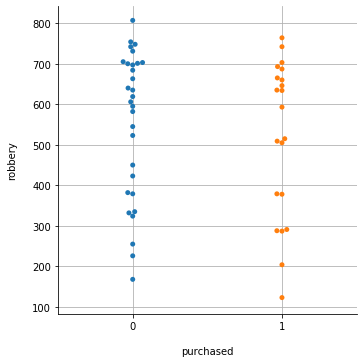

In [97]:
import seaborn as sns
sns.catplot(x='purchased',y='shop.theft',kind='swarm',data=dfd)
plt.xlabel("purchased", labelpad=15)
plt.ylabel("robbery", labelpad=15)
plt.grid()

In [85]:
x = dfd.iloc[:,[2,3]].values
y = dfd.iloc[:,7]


In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
    

In [88]:

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore')
transformed = onehotencoder.fit_transform(dfd[['purchased']]).toarray()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [89]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_train)

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
cm

array([[15,  6],
       [ 8, 11]], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score
print("Training data:",accuracy_score(y_train,y_pred))

Training data: 0.65


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


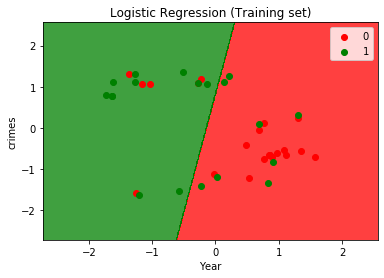

In [92]:

from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Year')
plt.ylabel('crimes')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


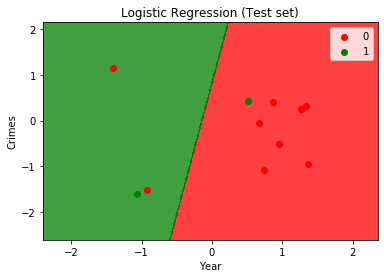

In [93]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.legend()
plt.show()

In [94]:
accuracy_score(y_test,classifier.predict(x_test))

0.7272727272727273

### SVM

In [35]:
dfd['purchased'] = df['purchased'].astype('category')
dfd.dtypes
cat_columns = dfd.select_dtypes(['category']).columns
dfd[cat_columns] = dfd[cat_columns].apply(lambda x: x.cat.codes)
dfd.head()

,stealing.general,shop.theft,burglary,robbery,fraud,vehicle.theft,house.theft,purchased
15,3694,123.0,1042,12,431,397.0,99.0,1
16,3736,168.0,1031,14,529,350.0,105.0,0
17,3939,204.0,1086,13,548,384.0,108.0,1
18,4240,291.0,1232,15,801,396.0,114.0,1
19,4142,255.0,1131,16,681,384.0,116.0,0


In [36]:
x = dfd.iloc[:,[2,3]].values
y = dfd.iloc[:,7]


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
    

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [39]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear")
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_train)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
cm

array([[15,  6],
       [ 7, 12]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
print("Training data:",accuracy_score(y_train,y_pred))

Training data: 0.675


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


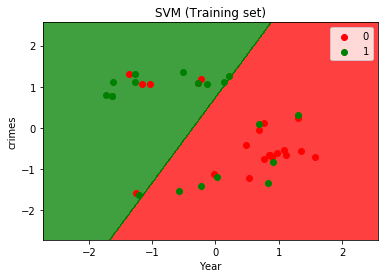

In [43]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Year')
plt.ylabel('crimes')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


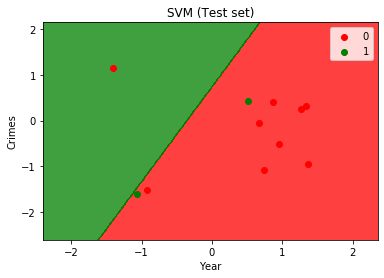

In [46]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.legend()
plt.show()

In [47]:
accuracy_score(y_test,classifier.predict(x_test))

0.7272727272727273

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(x_test))
cm

array([[6, 3],
       [1, 1]], dtype=int64)